In [26]:
# -*- coding: utf-8 -*-
###################################################################
#
# Author: Matthew W. Boyce, PhD, boyce.matthew@epa.gov
#
# Version: 2.0 10-07-2020
#
# Description:  This script compares the metabolite output for a number of 
#               metabolite prediction softwares: OCED Toolbox, Nexus Meteor, 
#               Oasis TIMES, and Biotransformer. The script is scalable and 
#               and can be expanded to include more or less metabolite software tools 
#               by changing the dfList variable, but will require additional
#               functions in the Model_Comp script to pull data from specific
#               datasets.
#
#
# Notes: This script uses os, pandas, numpy, matplotlib, rdkit, scipy, and Model_Comp
#
# Potential issues: None known
#
###################################################################


import os as os
import pandas as pd
import numpy as np
import sygma
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw

import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist, squareform, cdist



In [2]:
import sys

sys.path.append('/home/grace/Documents/python/in_silico_metabolism/src/data/')

from model_comp import *

In [3]:
raw_dat_dir = '/home/grace/Documents/python/in_silico_metabolism/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/in_silico_metabolism/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/in_silico_metabolism/data/interim/'
figures_dir = '/home/grace/Documents/python/in_silico_metabolism/reports/figures/'
external_dir = '/home/grace/Documents/python/in_silico_metabolism/data/external/'
userDir = 'C:\\USers\\MBOYCE\\Documents\\ExpoCast\\All Data\\'

## Table Of Contents:
* [Read and Clean](#first-bullet)
* [Prediction Counts Per Model and Parent](#second-bullet)
* [Summarized Data and Performance Evaluation](#third-bullet)
* [Performance Evaluation](#fourth-bullet)
* [Chemical Groupings](#third-bullet)
* [Grouped Performance](#third-bullet)

## Read and Clean <a class="anchor" id="first-bullet"></a>

In [4]:
modelList = ['ToolBox', 'Meteor','BioTransformer','TIMES_InVivo','TIMES_InVitro', 'SyGMa', 'CTS'] #Adjust as the model selection changes

In [5]:


#Importing the original csv file containing the compounds exported from CompTox dashboard
#Generates two dictionaries for the normal and qsar ready InChI keys to link to DTXSIDs
    
DSSToxList = pd.read_csv(processed_dat_dir+"CompToxList.csv", header = 0)
DSSToxList = DSSToxList.rename(columns={'INCHIKEY':'Parent_INCHIKEY'})
DSSToxList['QSAR_READY_INCHIKEY'] = SMILES_to_InchiKey(DSSToxList['QSAR_READY_SMILES'],stereoisomer = False)
Norm_DTXSID_dict = dict(zip(DSSToxList['Parent_INCHIKEY'],DSSToxList['DTXSID']))
QSAR_DTXSID_dict = dict(zip(DSSToxList['QSAR_READY_INCHIKEY'],DSSToxList['DTXSID']))

#Uses Model_Comp.py functions to import and cleanup data generated by each of the metabolite modeling softwares
toolBoxDF = ToolBox_cleanup(processed_dat_dir+'Toolbox_Report.csv', QSAR_DTXSID_dict)
meteorDF = Meteor_cleanup(processed_dat_dir+'Meteor_Report.csv')
bioTransformerDF = BioTransformer_cleanup(processed_dat_dir+'BioTransformer_Report.csv', Norm_DTXSID_dict)
times_inVivoDF = TIMES_cleanup(processed_dat_dir+'TIMES_invivo.txt', 'TIMES_InVivo')
times_inVitroDF = TIMES_cleanup(processed_dat_dir+'TIMES_invitro.txt', 'TIMES_InVitro')
ctsDF = CTS_cleanup(processed_dat_dir+'CTS_All_Report.csv', QSAR_DTXSID_dict)



In [6]:
#Generating SyGMa metabolites in notebook and using function to return appropriately formatted DF
sygmaDF = gen_sygma_metabolites_DF(DSSToxList['SMILES'], Norm_DTXSID_dict, pathways = [[sygma.ruleset['phase1'], 2],[sygma.ruleset['phase2'],1]])



float division by zero
float division by zero


In [8]:
#Import reported metabs from file exported by ChemReg and a file relating InChI keys to DTXSIDs
litDF = genLiteratureDF(processed_dat_dir+'ExpocastMetab_CompiledLit.csv', processed_dat_dir+'DTXSID_Markush_Final.csv')

In [9]:
toolBoxDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,ToolBox
1,DTXSID0044151,RPHKINMPYFJSCF-UHFFFAOYSA-N,Nc1cc(N)cc(N)c1,1
2,DTXSID0044151,DFWXYHZQNLIBLY-UHFFFAOYSA-N,Nc1cc(N)cc([N+](=O)[O-])c1,1
3,DTXSID0044151,VUCKZBYGRGKCCQ-UHFFFAOYSA-N,Nc1cc(NO)cc([N+](=O)[O-])c1,1
4,DTXSID0044151,WSIDAANKKVDFNY-UHFFFAOYSA-N,O=[N+]([O-])c1cc(NO)cc([N+](=O)[O-])c1,1
7,DTXSID6025725,VYBFQVODGUQVGO-UHFFFAOYSA-N,Nc1cc(O)cc([N+](=O)[O-])c1,1


In [10]:
meteorDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,Meteor
1,DTXSID0020151,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1
2,DTXSID0020151,WVDDGKGOMKODPV-UHFFFAOYSA-N,OCc1ccccc1,1
3,DTXSID0020151,WPYMKLBDIGXBTP-UHFFFAOYSA-N,O=C(O)c1ccccc1,1
4,DTXSID0020151,QIAFMBKCNZACKA-UHFFFAOYSA-N,O=C(O)CNC(=O)c1ccccc1,1
6,DTXSID0020151,BJUXDERNWYKSIQ-UHFFFAOYSA-N,CC(=O)NC(CSCc1ccccc1)C(=O)O,1


In [11]:
bioTransformerDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,BioTransformer
0,DTXSID0044151,QXYMVUZOGFVPGH-UHFFFAOYSA-N,NC1=C(O)C([N+](=O)[O-])=CC([N+](=O)[O-])=C1,1
2,DTXSID0044151,TTXPIURLJOPGTE-UHFFFAOYSA-N,NC1=CC([N+](=O)[O-])=C(O)C([N+](=O)[O-])=C1,1
3,DTXSID0044151,WSIDAANKKVDFNY-UHFFFAOYSA-N,O=[N+]([O-])C1=CC(NO)=CC([N+](=O)[O-])=C1,1
6,DTXSID0044151,OQLXBGXMCLUSAC-UHFFFAOYSA-N,NC1=C(O)C([N+](=O)[O-])=CC([N+](=O)[O-])=C1O,1
8,DTXSID0044151,ZVFXOCHWBWRBDV-UHFFFAOYSA-N,NC1=CC([N+](=O)[O-])=C(O)C([N+](=O)[O-])=C1O,1


In [12]:
times_inVivoDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,TIMES_InVivo
2,DTXSID8031077,FFRFJIZJLZXEJX-UHFFFAOYSA-N,COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(O)c2)ccc1O,1
3,DTXSID8031077,OJFGQVZAISEIPG-UHFFFAOYSA-N,O=C(C=Cc1ccc(O)c(O)c1)CC(=O)C=Cc1ccc(O)c(O)c1,1
4,DTXSID8031077,WSFSSNUMVMOOMR-UHFFFAOYSA-N,C=O,1
5,DTXSID8031077,BMXZRCJYODTEOW-UHFFFAOYSA-N,COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(O)c2)ccc1OC1...,1
6,DTXSID8031077,GJGKFIAVIYZXSZ-UHFFFAOYSA-N,COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(OC3OC(C(=O)O...,1


In [13]:
times_inVitroDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,TIMES_InVitro
2,DTXSID8031077,FFRFJIZJLZXEJX-UHFFFAOYSA-N,COc1cc(C=CC(=O)CC(=O)C=Cc2ccc(O)c(O)c2)ccc1O,1
3,DTXSID8031077,OJFGQVZAISEIPG-UHFFFAOYSA-N,O=C(C=Cc1ccc(O)c(O)c1)CC(=O)C=Cc1ccc(O)c(O)c1,1
4,DTXSID8031077,JILLUALLWXUFOB-UHFFFAOYSA-N,O=C(C=Cc1ccc(O)c(O)c1)CC(=O)C=Cc1ccc(O)c(OC2OC...,1
5,DTXSID8031077,HNLVONZUUFQCEJ-UHFFFAOYSA-N,O=C(C=Cc1ccc(O)c(O)c1)CC(=O)C=Cc1ccc(OC2OC(C(=...,1
6,DTXSID8031077,QKZDYCHIRDIHBQ-UHFFFAOYSA-N,NC(CCC(=O)NC(CSC(Cc1ccc(O)c(O)c1)C(=O)CC(=O)C=...,1


In [14]:
ctsDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Clean_SMILES,CTS
1,DTXSID0044151,DFWXYHZQNLIBLY-UHFFFAOYSA-N,Nc1cc(N)cc([N+](=O)[O-])c1,1
2,DTXSID0044151,RPHKINMPYFJSCF-UHFFFAOYSA-N,Nc1cc(N)cc(N)c1,1
3,DTXSID0044151,SUYLOMATYCPVFT-UHFFFAOYSA-N,Nc1cc(N)c(O)c(N)c1,1
4,DTXSID0044151,WFNVGXBEWXBZPL-UHFFFAOYSA-N,Nc1cc(N)cc(O)c1,1
5,DTXSID0044151,VKFBRTZWQOUOSP-UHFFFAOYSA-N,Nc1cc(N)cc(NO)c1,1


In [15]:
litDF.head(5)

,DTXSID,Metabolite_INCHIKEY,Reported,Metabolite DTXSID,Markush
0,DTXSID1025726,DPJCXCZTLWNFOH-UHFFFAOYSA-N,1,DTXSID1025726,False
1,DTXSID1025726,VEHLRRUCQAPNIT-QUARPLMYSA-N,1,DTXSID101025802,False
2,DTXSID1025726,WHODQVWERNSQEO-UHFFFAOYSA-N,1,DTXSID6020064,False
3,DTXSID1025726,IQXUIDYRTHQTET-UHFFFAOYSA-N,1,DTXSID50209864,False
4,DTXSID1025726,VZLLZDZTQPBHAZ-UHFFFAOYSA-N,1,DTXSID3060669,False


In [16]:
#Generate list of the dataframes containing the cleaned data then aggregates the data into a single dataframe: agg_Data
# Note: In the aggreagate data, each software has its own column with a 1 or 0, which indicates that the software 
#       predicted or did not predict that metabolite

dfList = [toolBoxDF, meteorDF, bioTransformerDF,times_inVivoDF, times_inVitroDF, sygmaDF, ctsDF, litDF]
agg_Data = aggregate_DFs(dfList)

agg_Data['Metabolite DTXSID'].replace(0, 'NA', inplace = True)
agg_Data['Markush'].replace(0, False, inplace = True)

agg_Data.sort_values(by='DTXSID')

,DTXSID,Metabolite_INCHIKEY,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Reported,Metabolite DTXSID,Markush
3042,DTXSID0020151,UYSKXFUQLZBPKP-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
2963,DTXSID0020151,FLWQJXIDAGIGBN-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
3027,DTXSID0020151,NPZVFJGEBZDVBM-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
2964,DTXSID0020151,WWOBNORICRFIOK-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
2965,DTXSID0020151,CHLHAPIXOIWPHN-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5526,DTXSID9047251,METSLMTUEASVPB-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
5527,DTXSID9047251,QFTGRERVWULBTD-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
5528,DTXSID9047251,YGJPATIPUUSKED-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False
5508,DTXSID9047251,XZKSAJUKOYBZML-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NA,False


In [17]:
rowSum = agg_Data[['ToolBox','Meteor','BioTransformer','TIMES_InVitro','TIMES_InVivo','SyGMa','CTS']].apply(lambda x: sum(x), axis = 1)
uniqueCount = sum(rowSum > 0)
uniqueCount

6770

In [18]:
for chem in set(agg_Data['DTXSID']):
    chemFilter = agg_Data['DTXSID'] == chem
    predictedFilter = rowSum > 0
    sumPredicted = sum(chemFilter & predictedFilter)
    print(chem, sumPredicted)

DTXSID7020182 134
DTXSID2026781 85
DTXSID5020027 55
DTXSID5020528 101
DTXSID9023752 124
DTXSID4023624 245
DTXSID6020143 97
DTXSID9020376 385
DTXSID7020685 26
DTXSID4020373 105
DTXSID1025726 165
DTXSID4020375 72
DTXSID0020151 148
DTXSID4020371 124
DTXSID4034150 573
DTXSID9047251 877
DTXSID3020205 415
DTXSID8020913 56
DTXSID0022777 97
DTXSID0020529 144
DTXSID7020762 19
DTXSID4025791 140
DTXSID0020575 95
DTXSID6022345 191
DTXSID1020069 728
DTXSID8020961 108
DTXSID8021482 38
DTXSID9020374 41
DTXSID9020453 25
DTXSID5023792 77
DTXSID8031077 540
DTXSID5025607 178
DTXSID5021889 140
DTXSID9020827 74
DTXSID6025725 148
DTXSID0044151 83
DTXSID5020152 117


In [19]:
for chem in set(agg_Data['DTXSID']):
    chemFilter = agg_Data['DTXSID'] == chem
    predictedFilter = agg_Data['Reported'] > 0
    sumMarkush = len(set(agg_Data['Metabolite DTXSID'][chemFilter & predictedFilter]))
    sumDiscrete = len(set(agg_Data['Metabolite_INCHIKEY'][chemFilter & predictedFilter]))
    print(chem, sumDiscrete, sumMarkush)

DTXSID7020182 4 4
DTXSID2026781 3 3
DTXSID5020027 10 10
DTXSID5020528 5 5
DTXSID9023752 2 2
DTXSID4023624 6 6
DTXSID6020143 2 2
DTXSID9020376 543 7
DTXSID7020685 15 10
DTXSID4020373 15 12
DTXSID1025726 8 8
DTXSID4020375 16 13
DTXSID0020151 9 9
DTXSID4020371 8 8
DTXSID4034150 8 7
DTXSID9047251 37 18
DTXSID3020205 11 11
DTXSID8020913 12 11
DTXSID0022777 4 4
DTXSID0020529 5 5
DTXSID7020762 2 2
DTXSID4025791 0 0
DTXSID0020575 8 8
DTXSID6022345 14 14
DTXSID1020069 6 6
DTXSID8020961 6 6
DTXSID8021482 4 4
DTXSID9020374 0 0
DTXSID9020453 6 6
DTXSID5023792 4 4
DTXSID8031077 13 13
DTXSID5025607 12 12
DTXSID5021889 2 2
DTXSID9020827 0 0
DTXSID6025725 7 7
DTXSID0044151 0 0
DTXSID5020152 4 4


In [20]:
agg_Data[(agg_Data['DTXSID'] == 'DTXSID4020373') & (agg_Data['Reported'] == 1)]

,DTXSID,Metabolite_INCHIKEY,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Reported,Metabolite DTXSID,Markush
221,DTXSID4020373,LNKQQZFLNUVWQQ-UHFFFAOYSA-N,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,DTXSID6073940,False
223,DTXSID4020373,PLAJRWVPXJKVML-UHFFFAOYSA-N,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,DTXSID50171173,False
224,DTXSID4020373,YIOCIFXUGBYCJR-UHFFFAOYSA-N,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,DTXSID3040699,False
226,DTXSID4020373,ZVIDYKRNLNAXFT-UHFFFAOYSA-N,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,DTXSID5041308,False
237,DTXSID4020373,YOLURZVIWIXYJT-UHFFFAOYSA-N,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,DTXSID901000292,False
238,DTXSID4020373,LXFMMUDXRIMBHN-UHFFFAOYSA-N,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,DTXSID80178554,False
6111,DTXSID4020373,UCNVFOCBFJOQAL-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,DTXSID9020374,False
6906,DTXSID4020373,AHJKRLASYNVKDZ-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID4020373,False
6907,DTXSID4020373,YAYNSRHGXUZDII-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID601026017,False
6908,DTXSID4020373,PZQUTPXIDGQKFZ-RXQGYGPJNA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID301026018,True


In [21]:
set(agg_Data['Metabolite DTXSID'][chemFilter & predictedFilter])

{'DTXSID5020152', 'DTXSID6020143', 'DTXSID8039241', 'DTXSID9046073'}

In [22]:
DTXSID_Metab_pairings = list(zip(agg_Data['DTXSID'],agg_Data['Metabolite_INCHIKEY']))

##Returns values that are duplicated in the list of DTXSID_Metab_Pairings
[(i,DTXSID_Metab_pairings.index(DTXSID_Metab_pairings[i]), DTXSID_Metab_pairings[i]) for i in range(len(DTXSID_Metab_pairings)) if not i == DTXSID_Metab_pairings.index(DTXSID_Metab_pairings[i])]

[]

## Prediction Counts Per Model and Parent <a class="anchor" id="second-bullet"></a>

In [23]:
# Model comparison for each parent compound

#Generate new dataframe to make comparison and assign DTXSIDs based on csv output from CompTox and takes the sum of metabolites generates
#for each DTXSID

metab_Comp = pd.DataFrame(data = None, columns = ['DTXSID','Metab_Count']+ modelList)
metab_Comp['DTXSID'] = DSSToxList['INPUT']
metab_Comp['Metab_Count'] = [agg_Data[agg_Data['DTXSID']==x].shape[0] for x in metab_Comp['DTXSID']]

#Returns the number of metabolites predicted by each software for each parent DTXSID
for model in modelList:
    metab_Comp[model] = [agg_Data[(agg_Data['DTXSID']==DTXSID)&(agg_Data[model]==1)].shape[0] for DTXSID in metab_Comp['DTXSID']]
    
metab_Comp.head(10)

,DTXSID,Metab_Count,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS
0,DTXSID0044151,83,4,4,9,0,0,80,5
1,DTXSID6025725,153,5,7,18,0,0,132,15
2,DTXSID8031077,551,11,17,20,32,12,493,21
3,DTXSID1025726,171,5,4,14,0,0,148,18
4,DTXSID4025791,140,11,7,14,0,0,130,6
5,DTXSID5023792,79,10,8,11,0,0,67,6
6,DTXSID8020961,111,3,7,14,0,0,91,16
7,DTXSID9020827,74,11,7,9,16,9,58,7
8,DTXSID0020151,153,4,5,15,7,4,132,9
9,DTXSID1020069,732,8,12,60,11,6,661,9


In [24]:
#uses the metab_Comp dataframe to generate a dataframe that summarized the percent of total metabolites generated by each software for each parent compound
metab_Comp_Percent = metab_Comp.copy()
for model in modelList:
    metab_Comp_Percent[model] = round([agg_Data[(agg_Data['DTXSID']==DTXSID)&(agg_Data[model]==1)].shape[0] 
                         for DTXSID in metab_Comp['DTXSID']]/metab_Comp['Metab_Count']*100,2)
    
metab_Comp_Percent.head(10)

,DTXSID,Metab_Count,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS
0,DTXSID0044151,83,4.82,4.82,10.84,0.00,0.00,96.39,6.02
1,DTXSID6025725,153,3.27,4.58,11.76,0.00,0.00,86.27,9.80
2,DTXSID8031077,551,2.00,3.09,3.63,5.81,2.18,89.47,3.81
3,DTXSID1025726,171,2.92,2.34,8.19,0.00,0.00,86.55,10.53
4,DTXSID4025791,140,7.86,5.00,10.00,0.00,0.00,92.86,4.29
5,DTXSID5023792,79,12.66,10.13,13.92,0.00,0.00,84.81,7.59
6,DTXSID8020961,111,2.70,6.31,12.61,0.00,0.00,81.98,14.41
7,DTXSID9020827,74,14.86,9.46,12.16,21.62,12.16,78.38,9.46
8,DTXSID0020151,153,2.61,3.27,9.80,4.58,2.61,86.27,5.88
9,DTXSID1020069,732,1.09,1.64,8.20,1.50,0.82,90.30,1.23


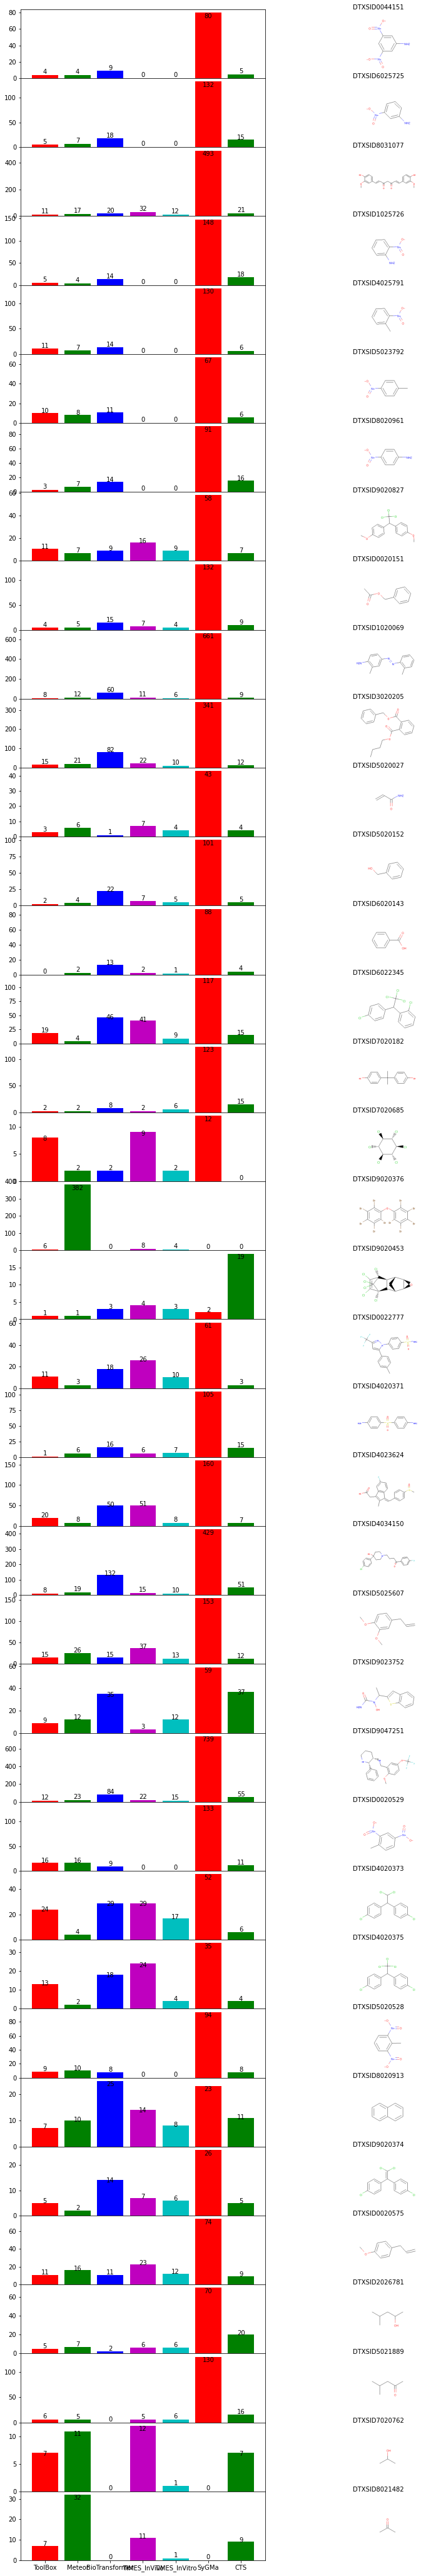

In [27]:
#Generates bargraphs for each parent compound that returns the total metabolites generated by each prediction software accompanied by
#a png of each starting DTXSID

#autolabel function was generated by matplotlib, and generates the total counts for each bar graph at the top of each graph

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
    
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        axs[x,0].text(rect.get_x() + rect.get_width()*offset[xpos], 0.9*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
        


fig, axs = plt.subplots(metab_Comp.shape[0],2, gridspec_kw = {'hspace':0,'wspace':0},figsize = (14, 75))
colors = ['r','g','b','m','c']
image_List = [Chem.Draw.MolToImage(Chem.MolFromSmiles(x)) for x in DSSToxList['SMILES']]
for x in range(metab_Comp.shape[0]):
    rect1 =  axs[x,0].bar(modelList, metab_Comp.loc[x, modelList], color = colors)
    autolabel(rect1)
    axs[x,1].imshow(image_List[x])
    axs[x,1].axis('off')
    axs[x,1].annotate(metab_Comp.loc[x, 'DTXSID'], xy = (0.0,0.3))


## Summarized Data and Performance Evaluation <a class="anchor" id="third-bullet"></a>

In [28]:
# Generate a dataframe (model_Comp) that compares the coverage of metabolites between the prediction softwares
#   To generate the table, the software columns are taken from the the aggreagate dataframe and the total and unique
#   metabolites are generates. The total is derived by taking the sum of each software's prediction column and the unqiue
#   is derived by summing each row, which is appended to the matchComp dataframe and titled 'Match_Count'. Each row of 
#   the prediction columns are compared to the 'Match_Count' and unique predictions are counted if the prediction column
#   and Match_Count are equal to 1.

matchComp = agg_Data[modelList]

#Generate column that sums the number of predictions for each row
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

#Generate new dataframe that summarizes the total and unique counts, and compares coverage between models
model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique'] + modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

#Sum the predictions of each software column and assign them to the 'Total' column of the comparison dataframe
total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

#Sum unique predictions of each software by taking predictions in the software column (matchComp[match]==1.0) and ensuring that
#these values are the only predictions for that compound (matchComp['Match_Count']==1.0)
uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

#For each software column in the comparison dataframe, sum the total number of overlapping predictions between the softwares
for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]
    
model_Comp

/home/grace/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS
0,ToolBox,314.0,7.0,314.0,108.0,63.0,187.0,157.0,143.0,129.0
1,Meteor,714.0,438.0,108.0,714.0,75.0,119.0,71.0,219.0,94.0
2,BioTransformer,827.0,552.0,63.0,75.0,827.0,47.0,50.0,225.0,81.0
3,TIMES_InVivo,459.0,123.0,187.0,119.0,47.0,459.0,130.0,196.0,68.0
4,TIMES_InVitro,211.0,10.0,157.0,71.0,50.0,130.0,211.0,109.0,79.0
5,SyGMa,5162.0,4606.0,143.0,219.0,225.0,196.0,109.0,5162.0,146.0
6,CTS,472.0,252.0,129.0,94.0,81.0,68.0,79.0,146.0,472.0


In [30]:
#Convert the model columns from total overlapping counts to %coverage between each model.
#% coverage takes the total overlapping predictions for Model1 and Model2 divided by the total predictions of Model2. The resulting value states that Model1
# covers x% of the predictions generated by Model2. In this caluclating, Model1 are the models in Column 1 and Model2 are the models between Columns 4-8
# (e.g., metabolites generated by Meteor (Col 1, Row 2) cover ~38.96% of the metabolites generated by ToolBox, ~6.78% of the metabolites generated by 
# BioTransformer, ~25.75% of the metabolites from TIMES_InVivo, and ~37.55% of metabolites generated by TIMES_InVitro)

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100/model_Comp['Total'][modelList.index(model)]),2) for match in modelList]

avg_coverage = [round((model_Comp.loc[x,modelList].sum()-100)/(len(modelList)-1),2) for x in range(model_Comp.shape[0])]
model_Comp['Avg. Coverage'] = avg_coverage

#Calc performance metrics
precisionList = [calcPrecision(agg_Data, x) for x in modelList]
sensitivityList = [calcSensitivity(agg_Data, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList


model_Comp

,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Avg. Coverage,Precision,Sensitivity
0,ToolBox,314.0,7.0,100.00,15.13,7.62,40.74,74.41,2.77,27.33,28.00,0.213,0.275
1,Meteor,714.0,438.0,34.39,100.00,9.07,25.93,33.65,4.24,19.92,21.20,0.087,0.225
2,BioTransformer,827.0,552.0,20.06,10.50,100.00,10.24,23.70,4.36,17.16,14.34,0.047,0.150
3,TIMES_InVivo,459.0,123.0,59.55,16.67,5.68,100.00,61.61,3.80,14.41,26.95,0.124,0.237
4,TIMES_InVitro,211.0,10.0,50.00,9.94,6.05,28.32,100.00,2.11,16.74,18.86,0.237,0.204
5,SyGMa,5162.0,4606.0,45.54,30.67,27.21,42.70,51.66,100.00,30.93,38.12,0.012,0.267
6,CTS,472.0,252.0,41.08,13.17,9.79,14.81,37.44,2.83,100.00,19.85,0.093,0.179


In [31]:
combinedPrecision = calcPrecision(agg_Data, modelList)
combinedSensitivity = calcSensitivity(agg_Data, modelList)
(combinedPrecision, combinedSensitivity)


(0.017, 0.429)

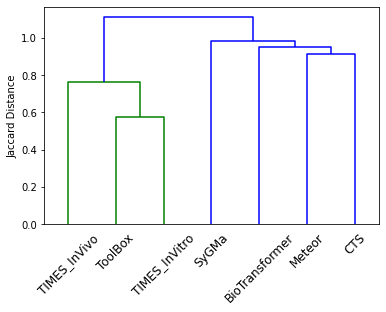

In [32]:
#Compare Similarity of predictions

model_fingerprint_DF = agg_Data.loc[:,['ToolBox', 'Meteor','BioTransformer','TIMES_InVivo','TIMES_InVitro','SyGMa', 'CTS']].transpose()
model_dist_vector = pdist(model_fingerprint_DF, 'jaccard')
cluster = hc.linkage(model_dist_vector, method = 'ward')

plot = hc.dendrogram(cluster, labels = ['ToolBox', 'Meteor','BioTransformer','TIMES_InVivo','TIMES_InVitro','SyGMa', 'CTS'], leaf_rotation = 45)
plt.ylabel('Jaccard Distance')
plt.savefig(figures_dir+'similarity.png', transparent = True)

## Chemical Groupings <a class="anchor" id="fourth-bullet"></a>

Morgans FP Grouping: radius = 2, bits = 2048

Text(0, 0.5, 'Jaccard Distance')

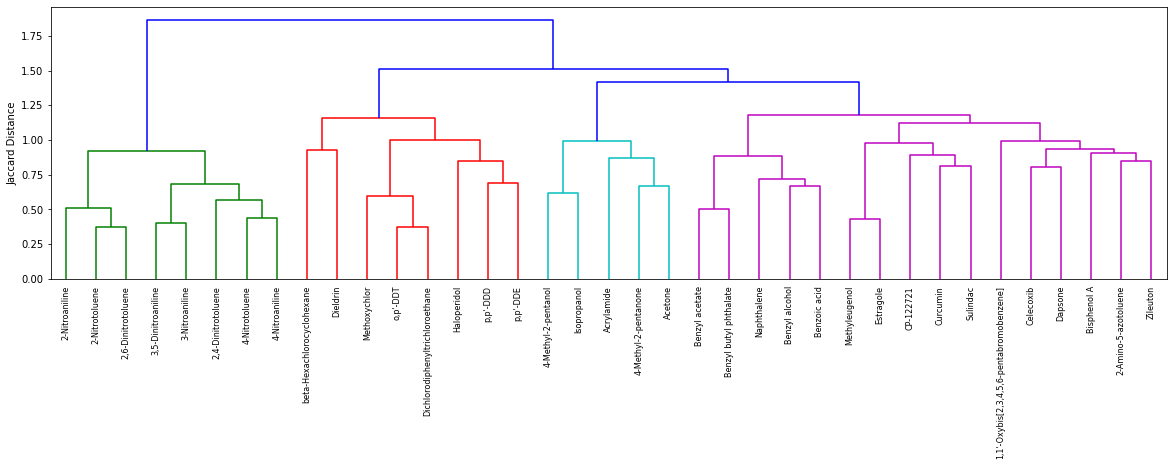

In [34]:
##Generate Heirarchal clustering for parents using morgan fingerprints in RDKit
parentMols = [Chem.MolFromSmiles(x) for x in DSSToxList['QSAR_READY_SMILES']]
parentFPS = np.array([np.array(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048)) for mol in parentMols])
parentDist = pdist(parentFPS, metric = 'jaccard')
parentGroup = hc.linkage(parentDist, method = 'ward')
parentLabel = DSSToxList['PREFERRED_NAME']
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
plot = hc.dendrogram(parentGroup, labels = parentLabel.to_list(), leaf_rotation = 90)#, labels = ['ToolBox', 'Meteor','BioTransformer','TIMES_InVivo','TIMES_InVitro','SyGMa'], leaf_rotation = 45)
plt.ylabel('Jaccard Distance')

In [35]:
groups = 5
groupCut = hc.cut_tree(parentGroup, groups)
par_Group = {'DTXSID': [None] * groups, 'MOL':[None] * groups}
for idx in range(len(groupCut)):
    groupValue = groupCut[idx, 0]
    if par_Group['DTXSID'][groupValue] is None:
        par_Group['DTXSID'][groupValue] = [DSSToxList.loc[idx, 'DTXSID']]
        par_Group['MOL'][groupValue] = [Chem.MolFromSmiles(DSSToxList.loc[idx, 'QSAR_READY_SMILES'])]
        
    else:
        par_Group['DTXSID'][groupValue] += [DSSToxList.loc[idx, 'DTXSID']]        
        par_Group['MOL'][groupValue] += [Chem.MolFromSmiles(DSSToxList.loc[idx, 'QSAR_READY_SMILES'])]

Group:  0


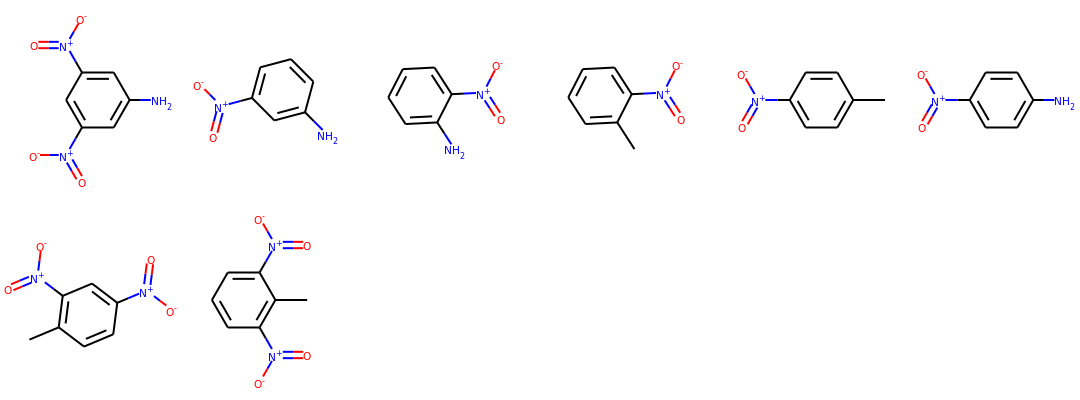

Group:  1


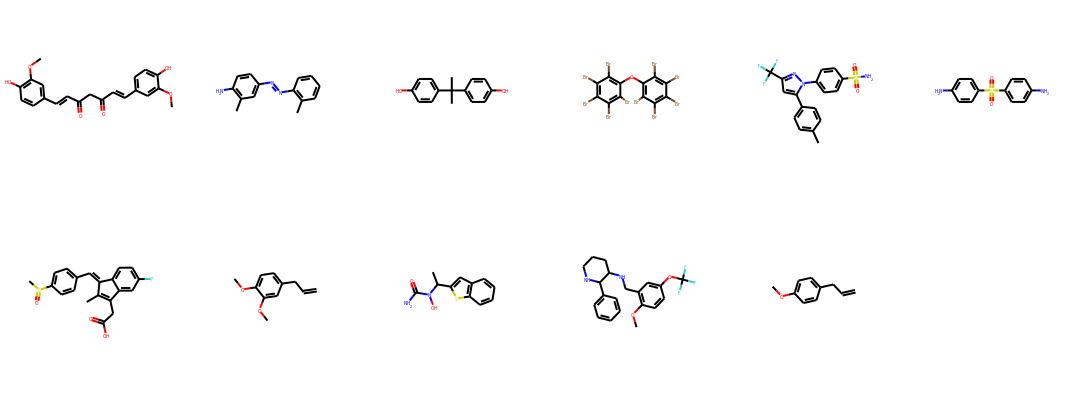

Group:  2


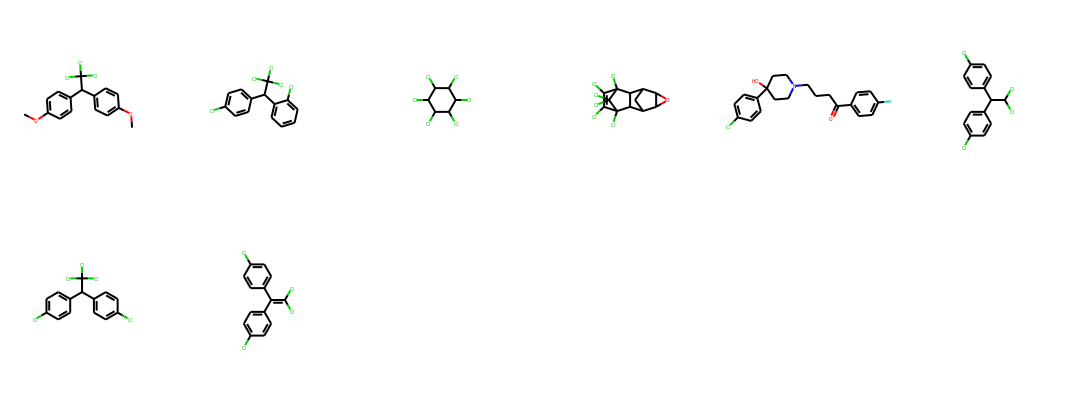

Group:  3


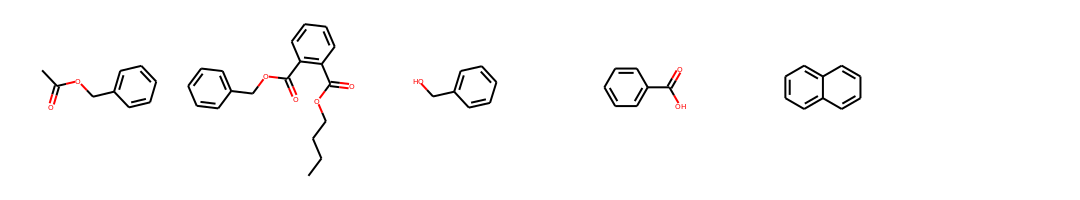

Group:  4


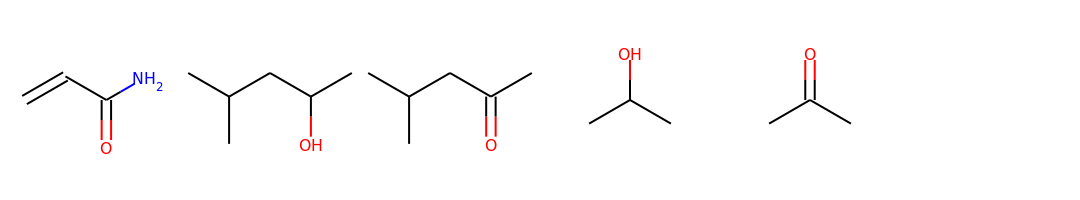

In [37]:
num = 0
for groups in par_Group['MOL']:
    print('Group: ', num)
    display(Draw.MolsToGridImage(groups, molsPerRow=6, subImgSize=(180, 200)))
    num+=1

#### Missing classyFire_ExpoCast.csv...

In [71]:
classyFireDF = pd.read_csv('classyFire_ExpoCast.csv')
DTXSIDlist = DSSToxList['INPUT']
matchDTXSID = []
for compoundID in classyFireDF['CompoundID']:
    idx = int(compoundID.split('-')[1])-1
    matchDTXSID += [DTXSIDlist[idx]]

classyFireDF['DTXSID'] = matchDTXSID

In [72]:
classyFireDF.head(5)

,CompoundID,ChemOntID,ParentName,DTXSID
0,Q5233679-1,CHEMONTID:0003968,Dinitroanilines,DTXSID0044151
1,Q5233679-1,CHEMONTID:0000036,Nitrobenzenes,DTXSID0044151
2,Q5233679-1,CHEMONTID:0004612,Nitroaromatic compounds,DTXSID0044151
3,Q5233679-1,CHEMONTID:0003633,"Propargyl-type 1,3-dipolar organic compounds",DTXSID0044151
4,Q5233679-1,CHEMONTID:0001508,Organic oxoazanium compounds,DTXSID0044151


In [73]:
fpCatalog = pd.Series(list(set(classyFireDF['ParentName'])))
fpCatalog

0                         Benzoic acid esters
1                                Naphthalenes
2                                    Sulfones
3                             Alkyl fluorides
4                              Ketene acetals
                        ...                  
103                            Fluorobenzenes
104                         Phenyl sulfoxides
105                          Carboxylic acids
106                             Benzoic acids
107    Organic carbonic acids and derivatives
Length: 108, dtype: object

In [74]:
fpDF = pd.DataFrame()
x = 0
for DTXSID in DTXSIDlist:
    fpList = []
    DTXSIDfilter = classyFireDF['DTXSID'] == DTXSID
    for fp in fpCatalog:
        fpList += [int(fp in classyFireDF.loc[DTXSIDfilter,'ParentName'].values)]
    fpDF[x] = fpList
    x+=1
fpMatrix = fpDF.T.values

Text(0, 0.5, 'Jaccard Distance')

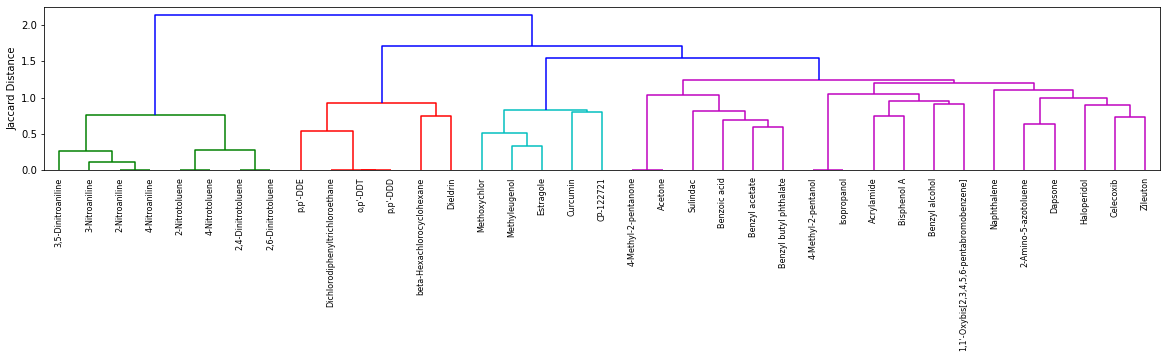

In [75]:
fpDist = pdist(fpMatrix, metric = 'jaccard')
parentGroup = hc.linkage(fpDist, method = 'ward')
parentLabel = DSSToxList['PREFERRED_NAME']
fig, axes = plt.subplots(1, 1, figsize=(20, 3))
plot = hc.dendrogram(parentGroup, labels = parentLabel.to_list(), leaf_rotation = 90)
plt.ylabel('Jaccard Distance')

Group:  0


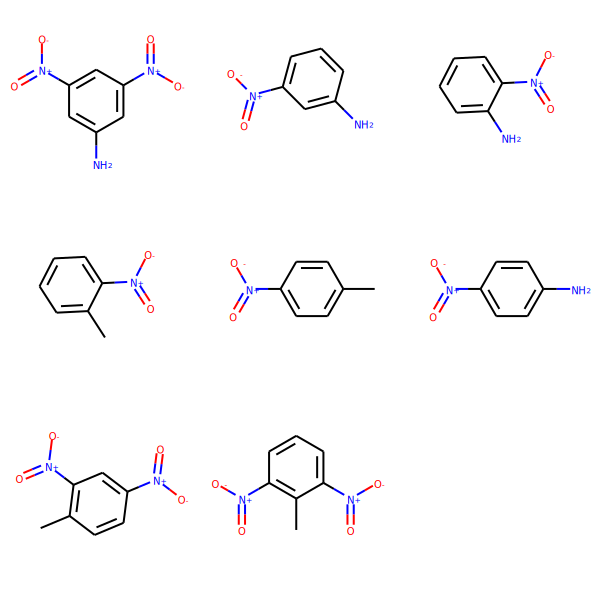

Group:  1


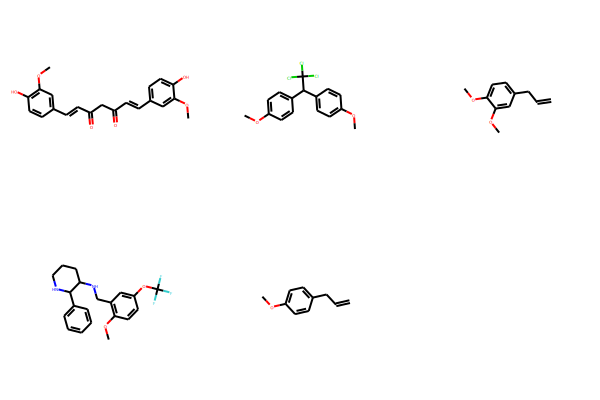

Group:  2


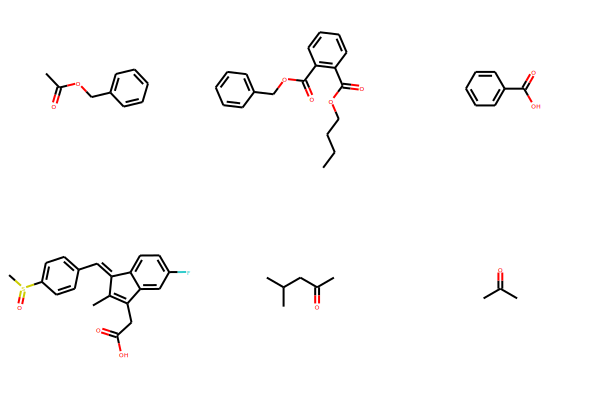

Group:  3


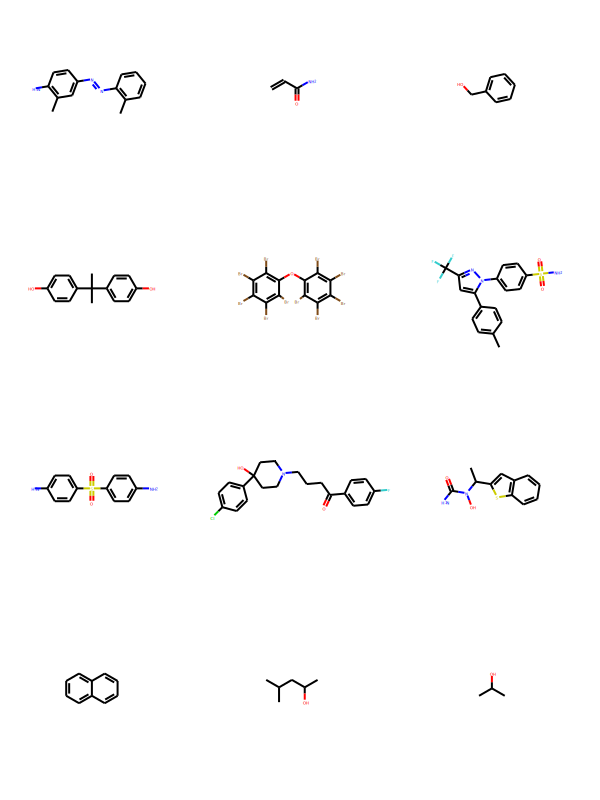

Group:  4


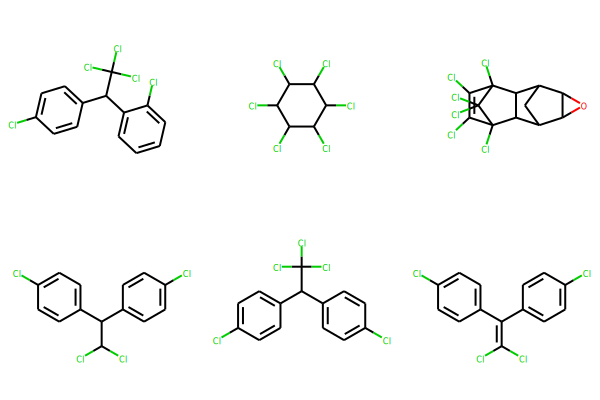

In [76]:
groups = 5
testCut = hc.cut_tree(parentGroup, groups)
cf_Group = {'DTXSID' : [None] * groups, 'MOL':[None] * groups}
for idx in range(len(testCut)):
    groupValue = testCut[idx, 0]
    if cf_Group['DTXSID'][groupValue] is None:
        cf_Group['DTXSID'][groupValue] = [DSSToxList.loc[idx, 'DTXSID']]
        cf_Group['MOL'][groupValue] = [Chem.MolFromSmiles(DSSToxList.loc[idx, 'QSAR_READY_SMILES'])]
        
    else:
        cf_Group['DTXSID'][groupValue] += [DSSToxList.loc[idx, 'DTXSID']]        
        cf_Group['MOL'][groupValue] += [Chem.MolFromSmiles(DSSToxList.loc[idx, 'QSAR_READY_SMILES'])]

num = 0
for groups in cf_Group['MOL']:
    print('Group: ', num)
    display(Draw.MolsToGridImage(groups, molsPerRow=3, subImgSize=(200, 200),  useSVG=True))
    num+=1


## Performance Per Grouping <a class="anchor" id="fifth-bullet"></a>

In [77]:
group = cf_Group['DTXSID'][0]

performanceComp = agg_Data[agg_Data['DTXSID'].isin(group)]

matchComp = agg_Data[agg_Data['DTXSID'].isin(group)][modelList]
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique']+modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

precisionList = [mc.calcPrecision(performanceComp, x) for x in modelList]
sensitivityList = [mc.calcSensitivity(performanceComp, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList 

for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100 / model_Comp['Total'][modelList.index(model)]),2) for match in modelList]    

avg_coverage = [round((model_Comp.loc[x, [match for match in modelList if match != modelList[x]]].sum())/(len(modelList)-1), 2) for x in range(model_Comp.shape[0])]

model_Comp['Avg. Coverage'] = avg_coverage
model_Comp

C:\Users\MBOYCE\Anaconda3\envs\my-RAX-env\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Precision,Sensitivity,Avg. Coverage
0,ToolBox,63.0,6.0,100.00,46.03,14.43,NaN,NaN,5.49,44.71,0.19,0.343,18.44
1,Meteor,63.0,0.0,46.03,100.00,18.56,NaN,NaN,6.74,31.76,0.143,0.257,17.18
2,BioTransformer,97.0,30.0,22.22,28.57,100.00,NaN,NaN,6.97,9.41,0.062,0.171,11.20
3,TIMES_InVivo,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.00,0.00,No predictions,0.000,0.00
4,TIMES_InVitro,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.00,0.00,No predictions,0.000,0.00
5,SyGMa,875.0,752.0,76.19,93.65,62.89,NaN,NaN,100.00,37.65,0.018,0.457,45.06
6,CTS,85.0,42.0,60.32,42.86,8.25,NaN,NaN,3.66,100.00,0.094,0.229,19.18


In [78]:
group = cf_Group['DTXSID'][1]

performanceComp = agg_Data[agg_Data['DTXSID'].isin(group)]

matchComp = agg_Data[agg_Data['DTXSID'].isin(group)][modelList]
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique']+modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

precisionList = [mc.calcPrecision(performanceComp, x) for x in modelList]
sensitivityList = [mc.calcSensitivity(performanceComp, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList 

for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100 / model_Comp['Total'][modelList.index(model)]),2) for match in modelList]    

avg_coverage = [round((model_Comp.loc[x, [match for match in modelList if match != modelList[x]]].sum())/(len(modelList)-1), 2) for x in range(model_Comp.shape[0])]

model_Comp['Avg. Coverage'] = avg_coverage
model_Comp

,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Precision,Sensitivity,Avg. Coverage
0,ToolBox,60.0,0.0,100.00,28.09,11.51,36.15,72.13,2.18,32.69,0.183,0.216,30.46
1,Meteor,89.0,18.0,41.67,100.00,15.11,26.15,36.07,4.09,22.12,0.101,0.176,24.20
2,BioTransformer,139.0,109.0,26.67,23.60,100.00,10.00,22.95,1.25,19.23,0.094,0.235,17.28
3,TIMES_InVivo,130.0,29.0,78.33,38.20,9.35,100.00,65.57,5.34,25.96,0.069,0.176,37.12
4,TIMES_InVitro,61.0,4.0,73.33,24.72,10.07,30.77,100.00,2.44,25.96,0.164,0.196,27.88
5,SyGMa,1517.0,1387.0,55.00,69.66,13.67,62.31,60.66,100.00,34.62,0.007,0.196,49.32
6,CTS,104.0,49.0,56.67,25.84,14.39,20.77,44.26,2.37,100.00,0.077,0.157,27.38


In [79]:
group = cf_Group['DTXSID'][2]

performanceComp = agg_Data[agg_Data['DTXSID'].isin(group)]

matchComp = agg_Data[agg_Data['DTXSID'].isin(group)][modelList]
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique']+modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

precisionList = [mc.calcPrecision(performanceComp, x) for x in modelList]
sensitivityList = [mc.calcSensitivity(performanceComp, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList 

for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100 / model_Comp['Total'][modelList.index(model)]),2) for match in modelList]    

avg_coverage = [round((model_Comp.loc[x, [match for match in modelList if match != modelList[x]]].sum())/(len(modelList)-1), 2) for x in range(model_Comp.shape[0])]

model_Comp['Avg. Coverage'] = avg_coverage
model_Comp

,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Precision,Sensitivity,Avg. Coverage
0,ToolBox,52.0,0.0,100.00,28.77,0.00,45.92,86.67,3.39,35.09,0.269,0.412,33.31
1,Meteor,73.0,20.0,40.38,100.00,1.25,33.67,53.33,5.65,35.09,0.219,0.471,28.23
2,BioTransformer,160.0,127.0,0.00,2.74,100.00,2.04,3.33,3.73,3.51,0.013,0.059,2.56
3,TIMES_InVivo,98.0,19.0,86.54,45.21,1.25,100.00,76.67,6.78,33.33,0.163,0.471,41.63
4,TIMES_InVitro,30.0,0.0,50.00,21.92,0.62,23.47,100.00,2.26,31.58,0.400,0.353,21.64
5,SyGMa,885.0,766.0,57.69,68.49,20.62,61.22,66.67,100.00,49.12,0.018,0.471,53.97
6,CTS,57.0,23.0,38.46,27.40,1.25,19.39,60.00,3.16,100.00,0.246,0.412,24.94


In [80]:
group = cf_Group['DTXSID'][3]

performanceComp = agg_Data[agg_Data['DTXSID'].isin(group)]

matchComp = agg_Data[agg_Data['DTXSID'].isin(group)][modelList]
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique']+modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

precisionList = [mc.calcPrecision(performanceComp, x) for x in modelList]
sensitivityList = [mc.calcSensitivity(performanceComp, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList 

for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100 / model_Comp['Total'][modelList.index(model)]),2) for match in modelList]    

avg_coverage = [round((model_Comp.loc[x, [match for match in modelList if match != modelList[x]]].sum())/(len(modelList)-1), 2) for x in range(model_Comp.shape[0])]

model_Comp['Avg. Coverage'] = avg_coverage
model_Comp

,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Precision,Sensitivity,Avg. Coverage
0,ToolBox,69.0,1.0,100.00,6.12,6.58,34.19,63.29,1.59,19.77,0.246,0.235,21.92
1,Meteor,474.0,390.0,42.03,100.00,9.09,38.46,36.71,3.42,12.99,0.055,0.265,23.78
2,BioTransformer,319.0,222.0,30.43,6.12,100.00,21.37,30.38,4.31,20.90,0.053,0.221,18.92
3,TIMES_InVivo,117.0,25.0,57.97,9.49,7.84,100.00,51.90,3.19,11.30,0.162,0.279,23.62
4,TIMES_InVitro,79.0,6.0,72.46,6.12,7.52,35.04,100.00,2.48,18.08,0.253,0.279,23.62
5,SyGMa,1694.0,1538.0,39.13,12.24,22.88,46.15,53.16,100.00,27.12,0.012,0.309,33.45
6,CTS,177.0,104.0,50.72,4.85,11.60,17.09,40.51,2.83,100.00,0.079,0.191,21.27


In [81]:
group = cf_Group['DTXSID'][4]

performanceComp = agg_Data[agg_Data['DTXSID'].isin(group)]

matchComp = agg_Data[agg_Data['DTXSID'].isin(group)][modelList]
matchComp['Match_Count']= matchComp.apply(lambda x: sum(x), axis = 1)

model_Comp = pd.DataFrame(data = None, columns=['Model','Total','Unique']+modelList)
model_Comp.loc[:,'Model'] = [model for model in modelList]

total_Counts = [totals for totals in matchComp[modelList].sum(axis=0)]
model_Comp.loc[:,'Total'] = total_Counts

uniqueCounts = [matchComp[match][(matchComp[match]==1.0)&(matchComp['Match_Count']==1.0)].sum() for match in modelList]
model_Comp.loc[:,'Unique'] = uniqueCounts

precisionList = [mc.calcPrecision(performanceComp, x) for x in modelList]
sensitivityList = [mc.calcSensitivity(performanceComp, x) for x in modelList]
model_Comp['Precision'] = precisionList
model_Comp['Sensitivity'] = sensitivityList 

for model in modelList:
    model_Comp.loc[:,model] = [(matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()) for match in modelList]

for model in modelList:
    model_Comp.loc[:,model] = [round((matchComp[model][(matchComp[model]==1.0)&(matchComp[match] == 1.0)].sum()*100 / model_Comp['Total'][modelList.index(model)]),2) for match in modelList]    

avg_coverage = [round((model_Comp.loc[x, [match for match in modelList if match != modelList[x]]].sum())/(len(modelList)-1), 2) for x in range(model_Comp.shape[0])]

model_Comp['Avg. Coverage'] = avg_coverage
model_Comp

,Model,Total,Unique,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Precision,Sensitivity,Avg. Coverage
0,ToolBox,70.0,0.0,100.00,26.67,10.71,48.25,90.24,4.51,4.08,0.186,0.250,30.74
1,Meteor,15.0,2.0,5.71,100.00,4.46,6.14,9.76,4.51,2.04,0.133,0.038,5.44
2,BioTransformer,112.0,64.0,17.14,33.33,100.00,6.14,26.83,15.98,28.57,0.009,0.019,21.33
3,TIMES_InVivo,114.0,49.0,78.57,46.67,6.25,100.00,63.41,5.33,4.08,0.114,0.250,34.05
4,TIMES_InVitro,41.0,0.0,52.86,26.67,9.82,22.81,100.00,4.92,4.08,0.195,0.154,20.19
5,SyGMa,244.0,192.0,15.71,73.33,34.82,11.40,29.27,100.00,18.37,0.016,0.077,30.48
6,CTS,49.0,34.0,2.86,6.67,12.50,1.75,4.88,3.69,100.00,0.000,0.000,5.39
